In [13]:
from __future__ import print_function

import tensorflow as tf

from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

# Computer Vision using convlutional neural networks

### Define our setup parameters and import data

In [5]:
epochs = 5
batch_size = 128
num_classes = 10

# Define our image dimensions
img_rows, img_cols = 28, 28

# Import the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Set data ordering
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Create our simple model

A neural network with no hidden layers and a softmax activation function is just multinomial logistic regression. 

Note that we flatten using a `Flatten` layer, as logistic regression takes vectors as inputs (this is part of the reason convolutional neural networks outperform logistic regression - they retain the spatial information of the pixels).

In [7]:
simplemodel = Sequential()
simplemodel.add(Flatten())
simplemodel.add(Dense(num_classes, activation='softmax'))


# Compile the model
simplemodel.compile(loss="categorical_crossentropy",
              optimizer="adadelta",
              metrics=['accuracy'])

### Train and test the model  

What accuracy do you get after 5 epochs?

In [12]:
fit_history = simplemodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1)
score = simplemodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.4989 - acc: 0.6644
Epoch 2/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.4799 - acc: 0.6719
Epoch 3/20
60000/60000 [==============================] - 1s 12us/sample - loss: 1.4613 - acc: 0.6788
Epoch 4/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.4431 - acc: 0.6849
Epoch 5/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.4253 - acc: 0.6906
Epoch 6/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.4079 - acc: 0.6963
Epoch 7/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.3909 - acc: 0.7013
Epoch 8/20
60000/60000 [==============================] - 1s 11us/sample - loss: 1.3743 - acc: 0.7065
Epoch 9/20
60000/60000 [==============================] - 1s 13us/sample - loss: 1.3581 - acc: 0.7115
Epoch 10/20
60000/60000 [==============================] - 1s 12us/sample - loss: 

When training neural networks it is important to check the learning curves. The `fit` method in Keras returns a `fit_history` object that contains the loss over time (plus any other metrics defined when the model was compiled).

Text(0.5, 0, 'epoch')

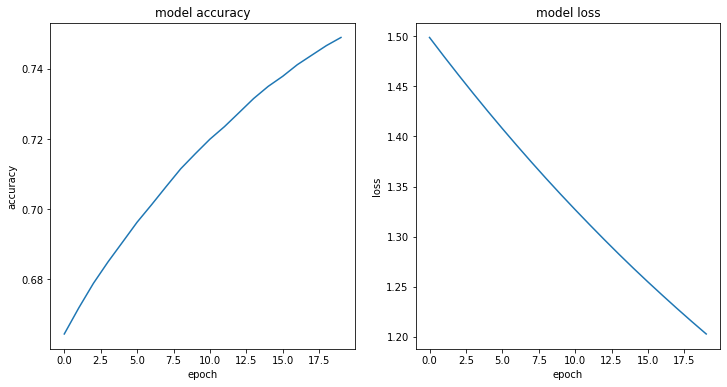

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# learning curve for accuracy
axes[0].plot(fit_history.history['acc'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')

# learning curve for loss
axes[1].plot(fit_history.history['loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')

### The task: Create a model using convolutional layers that performs better than the simple model  
Follow the syntax for creating a model above to create a convolutional model using `model.add(somelayer)`

In [26]:
model = Sequential()

### Your model here ###

# Useful layers:
# Conv2D(filters=int, kernel_size=(int, int), activation, input_shape=input_shape)
# MaxPooling2D(pool_size=(int, int))
# Dense(int, activation)
# Dropout(float)

# Useful activations:
# 'sigmoid'
# 'tanh'
# 'relu'
# 'softmax'

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

# Train and test our new model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 751us/sample - loss: 2.2839 - acc: 0.1435 - val_loss: 2.2534 - val_acc: 0.3663
Epoch 2/5
60000/60000 [==============================] - 44s 736us/sample - loss: 2.2367 - acc: 0.2661 - val_loss: 2.1969 - val_acc: 0.5978
Epoch 3/5
60000/60000 [==============================] - 44s 734us/sample - loss: 2.1771 - acc: 0.3768 - val_loss: 2.1223 - val_acc: 0.6698
Epoch 4/5
60000/60000 [==============================] - 43s 720us/sample - loss: 2.0983 - acc: 0.4529 - val_loss: 2.0228 - val_acc: 0.7186
Epoch 5/5
60000/60000 [==============================] - 42s 703us/sample - loss: 1.9932 - acc: 0.5120 - val_loss: 1.8891 - val_acc: 0.7426
Test loss: 1.8891402225494385
Test accuracy: 0.7426


# Natural Language Processing using Recurrent Neural Networks

We will lose the IMDB datasets, which is 50,000 movie reviews. We will train a recurrent neural network to classify the reviews into positive and negative sentiment.

We start by loading the dataset.

In [27]:
NUM_WORDS = 1004 # Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.
SKIP_TOP = 0 # Top most frequent words to ignore (they will appear as oov_char value in the sequence data).
MAXLEN = None # Maximum sequence length. Any longer sequence will be truncated.
START_CHAR = 1 # The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.
OOV_CHAR = 2 # int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.
INDEX_FROM = 3 # Index actual words with this index and higher.
SEED = 123

PADDED_LENGTH = 500 #  The length of the padded sequences

# Load unencoded data (array of integers)
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=NUM_WORDS,
                                                      skip_top=SKIP_TOP,
                                                      maxlen=MAXLEN,
                                                      seed=SEED,
                                                      start_char=START_CHAR,
                                                      oov_char=OOV_CHAR,
                                                      index_from=INDEX_FROM)

# Subset the data as it is quite large and requires too much RAM for most laptops
# Increase these numbers if you are able
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

## Preprocessing the sequences

`x_train` and `x_test` are lists (with length 25,000), where each element is a sequence of integers. Each integer corresponds to a unique word.
A neural network requires all the sequences to have the same length, so we pad the shorter sequences with zeros using `pad_sequences`.

In [28]:
x_train = pad_sequences(x_train, maxlen=PADDED_LENGTH)
x_test = pad_sequences(x_test, maxlen=PADDED_LENGTH)

## Building a recurrent neural network

We use the same workflow as above: we define the layers, compile the model then fit. The main difference here is that, as we are using sequence data, we use an LSTM as the first layer rather than convolutions.

We also use an embedding layer before the LSTM. Here we learn the embeddings, but we could also use pre-trained embeddings such as [GloVe](https://nlp.stanford.edu/projects/glove/) or [Word2Vec](https://en.wikipedia.org/wiki/Word2vec). These have already been trained on huge datasets and often give better performance than training your own embeddings.

In [42]:
tf.reset_default_graph()

epochs = 5
batch_size = 64
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=NUM_WORDS, output_dim=embedding_dim)) # the input_dim here is the size of the vocabulary
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.fit(
  x_train, y_train,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/10
5000/5000 [==============================] - 95s 19ms/sample - loss: 0.6143 - acc: 0.6504
Epoch 2/10
1984/5000 [==========>...................] - ETA: 57s - loss: 0.4315 - acc: 0.8145

KeyboardInterrupt: 

Now we can test on the test set:

In [43]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1000/1000 [==============================] - 6s 6ms/sample - loss: 0.4271 - acc: 0.8030
Test loss: 0.42707300853729246
Test accuracy: 0.803


Now try and change your model (e.g. the number/types of layers, the size of the embedding layer) and try to improve on the test accuracy.

In [ ]:
# your code here